In [1]:
import os
import json
import numpy as np
import pandas as po
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
from nbeats_model import NBeatsNet

Using TensorFlow backend.


In [3]:
df = po.read_csv('data/2017_energy_5min_noTransform.csv')

In [4]:
scaler = MinMaxScaler()
df['W'] = scaler.fit_transform(df)

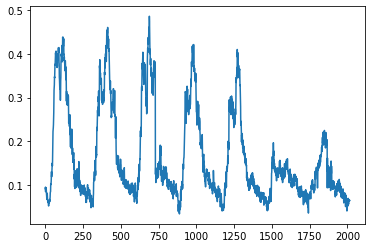

In [5]:
plt.plot(df[:288*7])

In [6]:
class Args:
    def __init__(self):
        self.val_start = 12*24*250
        self.test_start = 12*24*300
        #self.train_seq_len = 12*24*7
        self.val_seq_len = 12*24

        self.seasonality = 12*24
        self.batch_size = 512
        self.num_epochs = 100
        self.hidden_dim = 100
        self.theta_1 = 288*7
        self.theta_2 = 288*7
        self.nb_blocks_per_stack = 20

        self.save_folder = 'NBEATS_weekday_weekend_combined_with_OHE'

In [7]:
args = Args()

In [8]:
os.makedirs('forecasts/' + args.save_folder, exist_ok=True)
os.makedirs('saved_arrays/' + args.save_folder, exist_ok=True)

In [9]:
train_df = df[: args.val_start]
val_df = df[args.val_start: args.test_start]
test_df = df[args.test_start:]

In [10]:
def make_windows(data, train_seq_len, val_seq_len = args.val_seq_len):
    X = []
    y = []

    for i in tqdm(range(train_seq_len, len(data) - val_seq_len + 1)):    
        X.append(data.values[i - train_seq_len: i].T.tolist())
        y.append(data.values[i: i + val_seq_len].T.tolist())

    X = np.array(X).squeeze().reshape(-1, train_seq_len, 1)
    y = np.array(y).squeeze()
    
    return X, y

In [11]:
for train_seq_len in list(range(7*288, (35+1)*288, 7*288)):
    X_train, y_train = make_windows(train_df, train_seq_len)
    X_val, y_val = make_windows(val_df, train_seq_len)
    X_test, y_test = make_windows(test_df, train_seq_len)

    y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
    y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)
    y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)
    
    np.savez('saved_arrays/train_val_test_{}.npz'.format(train_seq_len), X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

100%|██████████| 4033/4033 [00:01<00:00, 2492.27it/s]


In [ ]:
data = np.load('mat.npz')
print data['name1']
print data['name2']